In [2]:
import pandas as pd 
import numpy as np 
import matplotlib as plt



In [3]:
df_btc = pd.read_csv('../data/btc.csv')
df_dxy = pd.read_csv('../data/dxy.csv')
df_dsg = pd.read_csv('../data/dsg.csv')

In [4]:
df_btc.head()

,date,bitcoin_price,High,Low,Open,Volume
0,NaN,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1,2015-01-01,314.2489929199219,320.43499755859375,314.00299072265625,320.43499755859375,8036550
2,2015-01-02,315.0320129394531,315.8389892578125,313.56500244140625,314.0790100097656,7860650
3,2015-01-03,281.0820007324219,315.1499938964844,281.0820007324219,314.84600830078125,33054400
4,2015-01-04,264.19500732421875,287.2300109863281,257.61199951171875,281.14599609375,55629100


In [5]:
df_dsg.head()

,date,DGS2
0,2015-01-01,NaN
1,2015-01-02,0.66
2,2015-01-05,0.68
3,2015-01-06,0.65
4,2015-01-07,0.62


In [6]:
df_dxy.head()

,date,dxy,High,Low,Open,Volume
0,NaN,DX-Y.NYB,DX-Y.NYB,DX-Y.NYB,DX-Y.NYB,DX-Y.NYB
1,2015-01-02,91.08000183105469,91.16000366210938,90.33000183105469,90.36000061035156,0
2,2015-01-05,91.37999725341797,91.77999877929688,91.12999725341797,91.12999725341797,0
3,2015-01-06,91.5,91.80999755859375,91.12000274658203,91.37999725341797,0
4,2015-01-07,91.88999938964844,92.2699966430664,91.6500015258789,91.75,0


In [7]:
df_btc = df_btc.drop(0).reset_index(drop=True)
df_dsg = df_dsg.drop(0).reset_index(drop=True)
df_dxy = df_dxy.drop(0).reset_index(drop=True)

In [8]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3737 entries, 0 to 3736
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           3737 non-null   object
 1   bitcoin_price  3737 non-null   object
 2   High           3737 non-null   object
 3   Low            3737 non-null   object
 4   Open           3737 non-null   object
 5   Volume         3737 non-null   object
dtypes: object(6)
memory usage: 175.3+ KB


In [9]:
df_dsg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2667 non-null   object 
 1   DGS2    2557 non-null   float64
dtypes: float64(1), object(1)
memory usage: 41.8+ KB


In [10]:
df_dsg[df_dsg.isna() == True]

,date,DGS2
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
2662,NaN,NaN
2663,NaN,NaN
2664,NaN,NaN
2665,NaN,NaN


In [11]:
df_dxy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2572 entries, 0 to 2571
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2572 non-null   object
 1   dxy     2572 non-null   object
 2   High    2572 non-null   object
 3   Low     2572 non-null   object
 4   Open    2572 non-null   object
 5   Volume  2572 non-null   object
dtypes: object(6)
memory usage: 120.7+ KB


In [12]:
df_btc['date'] = pd.to_datetime(df_btc['date'], format= '%Y-%m-%d')
df_btc.set_index('date', inplace=True)

df_dsg['date'] = pd.to_datetime(df_dsg['date'], format= '%Y-%m-%d')
df_dsg.set_index('date', inplace=True)

df_dxy['date'] = pd.to_datetime(df_dxy['date'], format= '%Y-%m-%d')
df_dxy.set_index('date', inplace=True)

In [13]:
# Merge df_dxy into df_btc using a left join
merged_df = df_btc.merge(df_dxy, on='date', how='left')

# Merge df_dsg into the merged dataframe using a left join
merged_df = merged_df.merge(df_dsg, on='date', how='left')

merged_df.head()

,bitcoin_price,High_x,Low_x,Open_x,Volume_x,dxy,High_y,Low_y,Open_y,Volume_y,DGS2
date,,,,,,,,,,,
2015-01-01,314.2489929199219,320.43499755859375,314.00299072265625,320.43499755859375,8036550,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,315.0320129394531,315.8389892578125,313.56500244140625,314.0790100097656,7860650,91.08000183105469,91.16000366210938,90.33000183105469,90.36000061035156,0,0.66
2015-01-03,281.0820007324219,315.1499938964844,281.0820007324219,314.84600830078125,33054400,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,264.19500732421875,287.2300109863281,257.61199951171875,281.14599609375,55629100,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,274.4739990234375,278.34100341796875,265.0840148925781,265.0840148925781,43962800,91.37999725341797,91.77999877929688,91.12999725341797,91.12999725341797,0,0.68


In [14]:
# Drop the first row
merged_df = merged_df.drop(merged_df.index[0])

# Replace '_x' with '_btc' and '_y' with '_dxy' in column names
merged_df.columns = merged_df.columns.str.replace('_x', '_btc').str.replace('_y', '_dxy')

merged_df.head()

,bitcoin_price,High_btc,Low_btc,Open_btc,Volume_btc,dxy,High_dxy,Low_dxy,Open_dxy,Volume_dxy,DGS2
date,,,,,,,,,,,
2015-01-02,315.0320129394531,315.8389892578125,313.56500244140625,314.0790100097656,7860650,91.08000183105469,91.16000366210938,90.33000183105469,90.36000061035156,0,0.66
2015-01-03,281.0820007324219,315.1499938964844,281.0820007324219,314.84600830078125,33054400,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,264.19500732421875,287.2300109863281,257.61199951171875,281.14599609375,55629100,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,274.4739990234375,278.34100341796875,265.0840148925781,265.0840148925781,43962800,91.37999725341797,91.77999877929688,91.12999725341797,91.12999725341797,0,0.68
2015-01-06,286.1889953613281,287.5530090332031,272.6960144042969,274.6109924316406,23245700,91.5,91.80999755859375,91.12000274658203,91.37999725341797,0,0.65


In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3736 entries, 2015-01-02 to 2025-03-25
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bitcoin_price  3736 non-null   object 
 1   High_btc       3736 non-null   object 
 2   Low_btc        3736 non-null   object 
 3   Open_btc       3736 non-null   object 
 4   Volume_btc     3736 non-null   object 
 5   dxy            2572 non-null   object 
 6   High_dxy       2572 non-null   object 
 7   Low_dxy        2572 non-null   object 
 8   Open_dxy       2572 non-null   object 
 9   Volume_dxy     2572 non-null   object 
 10  DGS2           2557 non-null   float64
dtypes: float64(1), object(10)
memory usage: 350.2+ KB


In [16]:
merged_df[(merged_df['DGS2'].isna()) & (merged_df['dxy'].notna())].head(50)


,bitcoin_price,High_btc,Low_btc,Open_btc,Volume_btc,dxy,High_dxy,Low_dxy,Open_dxy,Volume_dxy,DGS2
date,,,,,,,,,,,
2015-10-12,245.30799865722656,247.45399475097656,245.1790008544922,246.875,17388300,94.83999633789062,94.87999725341797,94.62000274658203,94.8499984741211,0,NaN
2015-11-11,311.0840148925781,340.5849914550781,300.99700927734375,339.82000732421875,107070000,99.01000213623047,99.23999786376953,98.77999877929688,99.0999984741211,0,NaN
2016-01-18,387.1679992675781,388.10400390625,376.6650085449219,381.7330017089844,54403900,99.12000274658203,99.19999694824219,98.80000305175781,98.80000305175781,0,NaN
2017-10-09,4772.02001953125,4878.7099609375,4564.25,4614.52001953125,1968739968,93.73999786376953,93.83999633789062,93.62000274658203,93.7699966430664,0,NaN
2018-10-08,6652.22998046875,6675.06005859375,6576.0400390625,6600.18994140625,3979460000,95.7699966430664,96.02999877929688,95.58999633789062,95.62000274658203,0,NaN
2018-11-12,6371.27001953125,6434.2099609375,6360.47021484375,6411.759765625,4295770000,97.54000091552734,97.69000244140625,96.97000122070312,97.05000305175781,0,NaN
2019-10-14,8374.6865234375,8390.208984375,8284.130859375,8320.83203125,15151387859,98.44999694824219,98.52999877929688,98.33999633789062,98.36000061035156,0,NaN
2019-11-11,8757.7880859375,9081.279296875,8700.6083984375,9056.91796875,20265510765,98.19999694824219,98.37999725341797,98.12999725341797,98.37000274658203,0,NaN
2020-10-12,11555.36328125,11698.4677734375,11240.6865234375,11392.6357421875,26163972642,93.06999969482422,93.23999786376953,93.01000213623047,93.05999755859375,0,NaN


In [17]:
# Convert all columns to float
merged_df = merged_df.astype(float)

# Round all columns to 2 decimals
merged_df = merged_df.round(2)

merged_df.head()

,bitcoin_price,High_btc,Low_btc,Open_btc,Volume_btc,dxy,High_dxy,Low_dxy,Open_dxy,Volume_dxy,DGS2
date,,,,,,,,,,,
2015-01-02,315.03,315.84,313.57,314.08,7860650.0,91.08,91.16,90.33,90.36,0.0,0.66
2015-01-03,281.08,315.15,281.08,314.85,33054400.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,264.20,287.23,257.61,281.15,55629100.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,274.47,278.34,265.08,265.08,43962800.0,91.38,91.78,91.13,91.13,0.0,0.68
2015-01-06,286.19,287.55,272.70,274.61,23245700.0,91.50,91.81,91.12,91.38,0.0,0.65


Estrategia de llenado de nulos:

* Dado que durante los feriados y fines de semana el DXY y DGS2 no operan, se propone rellenar los valores faltantes con el valor
previo disponible.

Esto se lograra utilizando el metodo forward fill de pandas:


In [18]:
# Forward-fill NaNs in all columns
merged_df = merged_df.ffill()

In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3736 entries, 2015-01-02 to 2025-03-25
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bitcoin_price  3736 non-null   float64
 1   High_btc       3736 non-null   float64
 2   Low_btc        3736 non-null   float64
 3   Open_btc       3736 non-null   float64
 4   Volume_btc     3736 non-null   float64
 5   dxy            3736 non-null   float64
 6   High_dxy       3736 non-null   float64
 7   Low_dxy        3736 non-null   float64
 8   Open_dxy       3736 non-null   float64
 9   Volume_dxy     3736 non-null   float64
 10  DGS2           3736 non-null   float64
dtypes: float64(11)
memory usage: 350.2 KB


In [20]:
merged_df.head()

,bitcoin_price,High_btc,Low_btc,Open_btc,Volume_btc,dxy,High_dxy,Low_dxy,Open_dxy,Volume_dxy,DGS2
date,,,,,,,,,,,
2015-01-02,315.03,315.84,313.57,314.08,7860650.0,91.08,91.16,90.33,90.36,0.0,0.66
2015-01-03,281.08,315.15,281.08,314.85,33054400.0,91.08,91.16,90.33,90.36,0.0,0.66
2015-01-04,264.20,287.23,257.61,281.15,55629100.0,91.08,91.16,90.33,90.36,0.0,0.66
2015-01-05,274.47,278.34,265.08,265.08,43962800.0,91.38,91.78,91.13,91.13,0.0,0.68
2015-01-06,286.19,287.55,272.70,274.61,23245700.0,91.50,91.81,91.12,91.38,0.0,0.65


In [21]:
merged_df = merged_df.drop(merged_df.index[0])
merged_df.head()

,bitcoin_price,High_btc,Low_btc,Open_btc,Volume_btc,dxy,High_dxy,Low_dxy,Open_dxy,Volume_dxy,DGS2
date,,,,,,,,,,,
2015-01-03,281.08,315.15,281.08,314.85,33054400.0,91.08,91.16,90.33,90.36,0.0,0.66
2015-01-04,264.20,287.23,257.61,281.15,55629100.0,91.08,91.16,90.33,90.36,0.0,0.66
2015-01-05,274.47,278.34,265.08,265.08,43962800.0,91.38,91.78,91.13,91.13,0.0,0.68
2015-01-06,286.19,287.55,272.70,274.61,23245700.0,91.50,91.81,91.12,91.38,0.0,0.65
2015-01-07,294.34,298.75,283.08,286.08,24866800.0,91.89,92.27,91.65,91.75,0.0,0.62


In [22]:
merged_df['Volume_dxy'].value_counts()

Volume_dxy
0.0           3733
14290000.0       1
9000000.0        1
Name: count, dtype: int64

In [23]:
merged_df.drop(columns=['Volume_dxy'], axis=1, inplace= True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3735 entries, 2015-01-03 to 2025-03-25
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bitcoin_price  3735 non-null   float64
 1   High_btc       3735 non-null   float64
 2   Low_btc        3735 non-null   float64
 3   Open_btc       3735 non-null   float64
 4   Volume_btc     3735 non-null   float64
 5   dxy            3735 non-null   float64
 6   High_dxy       3735 non-null   float64
 7   Low_dxy        3735 non-null   float64
 8   Open_dxy       3735 non-null   float64
 9   DGS2           3735 non-null   float64
dtypes: float64(10)
memory usage: 321.0 KB


---

# Vista grafica

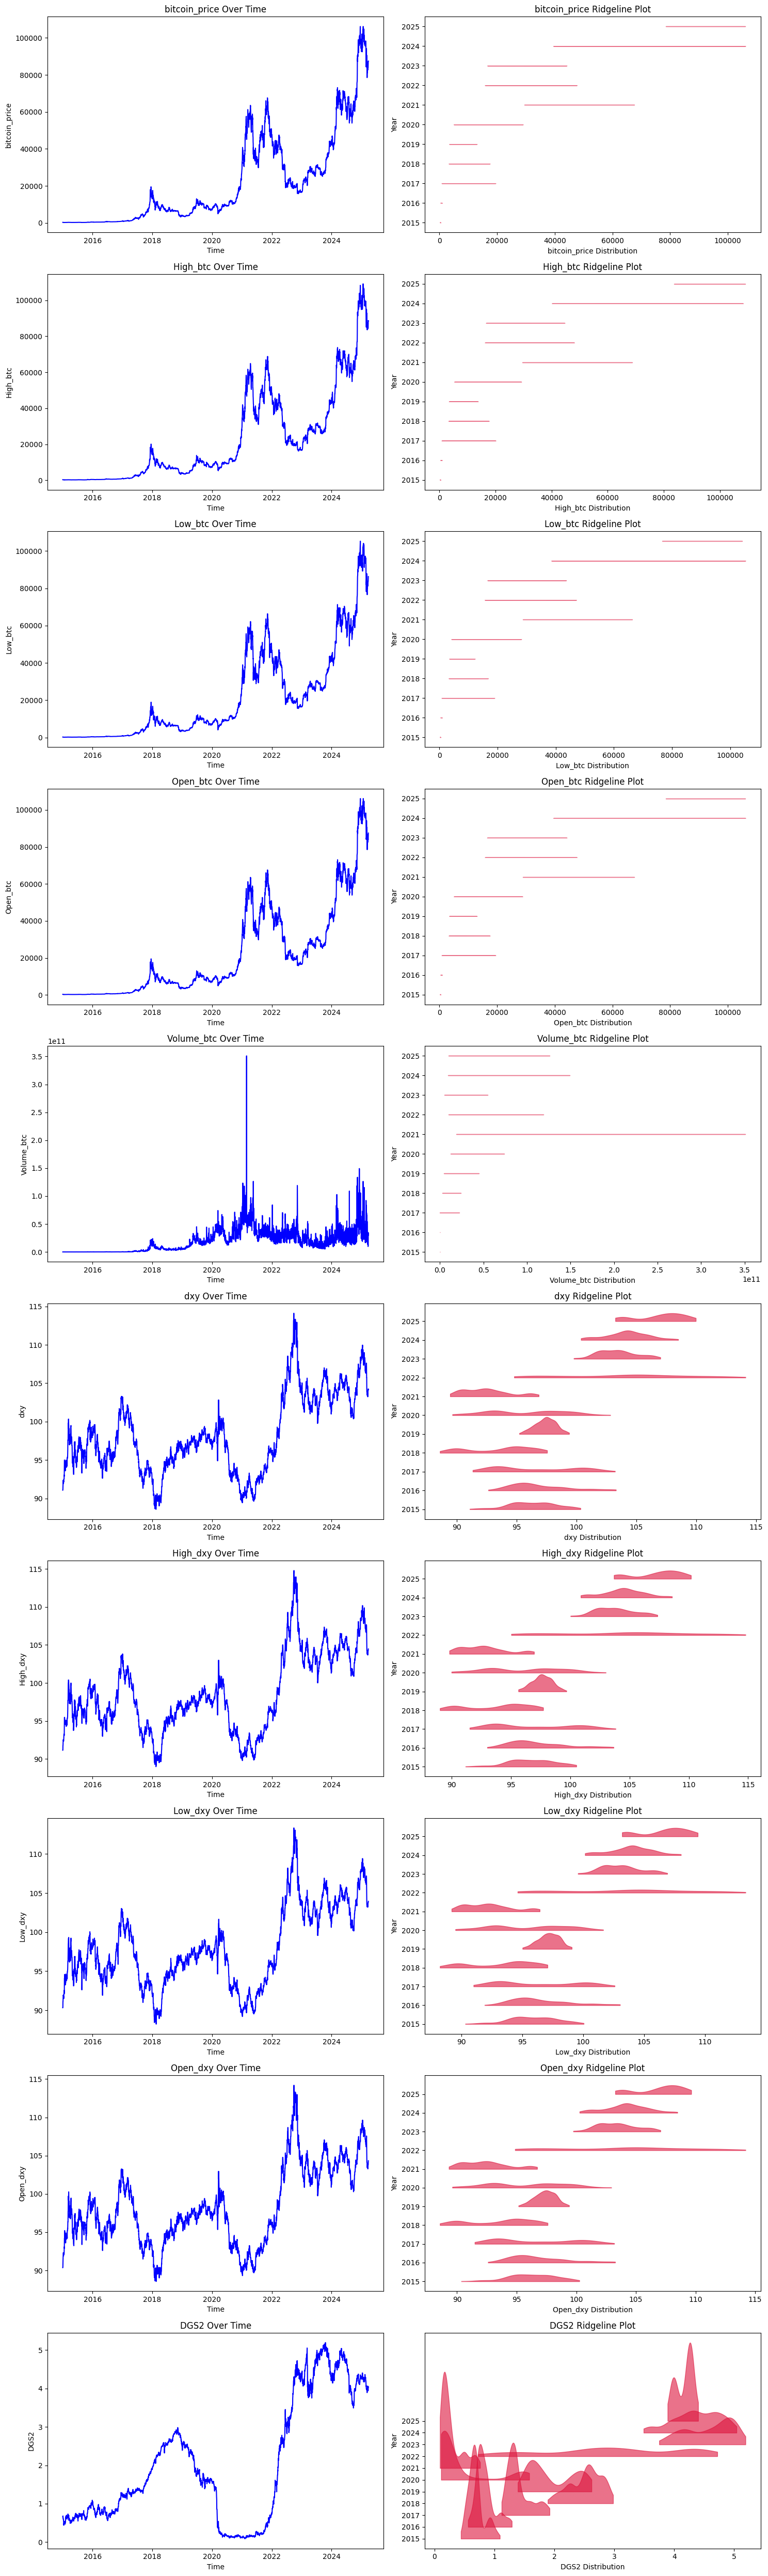

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Ensure the dataframe index is datetime
merged_df.index = pd.to_datetime(merged_df.index)

# Create a 'Year' column for grouping
merged_df['Year'] = merged_df.index.year

# Create the main figure with 2 subplots per row (time series | ridgeline)
fig, axes = plt.subplots(nrows=len(merged_df.columns) - 1, ncols=2,
                         figsize=(15, 5 * (len(merged_df.columns) - 1)))

# We'll ignore the 'Year' column when iterating through data columns
plot_cols = [c for c in merged_df.columns if c != 'Year']

for i, col in enumerate(plot_cols):
    # --- 1) Time Series on the left ---
    axes[i, 0].plot(merged_df.index, merged_df[col], color='blue')
    axes[i, 0].set_title(f"{col} Over Time")
    axes[i, 0].set_xlabel("Time")
    axes[i, 0].set_ylabel(col)

    # --- 2) Ridgeline Plot on the right ---
    ax_ridge = axes[i, 1]

    # Prepare data grouped by year
    data = merged_df[[col, 'Year']].dropna()
    years = sorted(data['Year'].unique())

    # We'll define an offset step to space out each year's distribution
    offset_step = 0.5

    for j, year in enumerate(years):
        subset = data.loc[data['Year'] == year, col]

        # If there's not enough data to estimate a distribution, skip
        if len(subset) < 2:
            continue

        # Compute the KDE
        kde = gaussian_kde(subset)
        # We'll evaluate the density on a grid from min to max
        x_vals = np.linspace(subset.min(), subset.max(), 200)
        density = kde(x_vals)

        # Shift this curve by j * offset_step on the y-axis
        # Fill between (the offset baseline) and (baseline + density)
        baseline = j * offset_step
        ax_ridge.fill_between(x_vals, baseline, baseline + density,
                              alpha=0.6, color='#DC143C', linewidth=1)

    ax_ridge.set_title(f"{col} Ridgeline Plot")
    ax_ridge.set_xlabel(f"{col} Distribution")

    # Label y-axis with the years at the correct offsets
    y_ticks = [j * offset_step for j in range(len(years))]
    ax_ridge.set_yticks(y_ticks)
    ax_ridge.set_yticklabels(years)
    ax_ridge.set_ylabel("Year")

# Adjust layout
fig.tight_layout()
plt.show()


---

# Transformaciones y Feature Engineering

Se aplicara:

* Transformacion logaritmica
* Diferenciacion de primer grado

Esto permite obtener series que reflejen la variacion porcentual en los precios diarios.

Luego:


* Variables derivadas de la fecha
* Lags de los ultimos 7 dias, y 4 anios atras para bitcoin. 
* Delta lags correspondientes
* SMA de varias ventanas
* EMAs de varias ventanas
* Max de los ultimos 7 y 30 dias
* Min de los ultimos 7 y 30 dias



In [25]:
# Transformacion logaritmica:
transformed_df = np.log(merged_df[['DGS2','bitcoin_price', 'dxy']].replace(0, np.nan)).dropna()
transformed_df.columns = [f"{col}_log" for col in transformed_df.columns]
transformed_df.head()

,DGS2_log,bitcoin_price_log,dxy_log
date,,,
2015-01-03,-0.415515,5.638639,4.511738
2015-01-04,-0.415515,5.576706,4.511738
2015-01-05,-0.385662,5.614842,4.515027
2015-01-06,-0.430783,5.656656,4.516339
2015-01-07,-0.478036,5.684736,4.520592


In [26]:
# Diferenciacion de primer orden:
for col in transformed_df.columns:
    transformed_df[f"{col}_diff"] = transformed_df[col].diff()

transformed_df.dropna(inplace=True)
transformed_df.head()

,DGS2_log,bitcoin_price_log,dxy_log,DGS2_log_diff,bitcoin_price_log_diff,dxy_log_diff
date,,,,,,
2015-01-04,-0.415515,5.576706,4.511738,0.000000,-0.061933,0.000000
2015-01-05,-0.385662,5.614842,4.515027,0.029853,0.038136,0.003288
2015-01-06,-0.430783,5.656656,4.516339,-0.045120,0.041814,0.001312
2015-01-07,-0.478036,5.684736,4.520592,-0.047253,0.028080,0.004253
2015-01-08,-0.478036,5.646683,4.525802,0.000000,-0.038053,0.005210


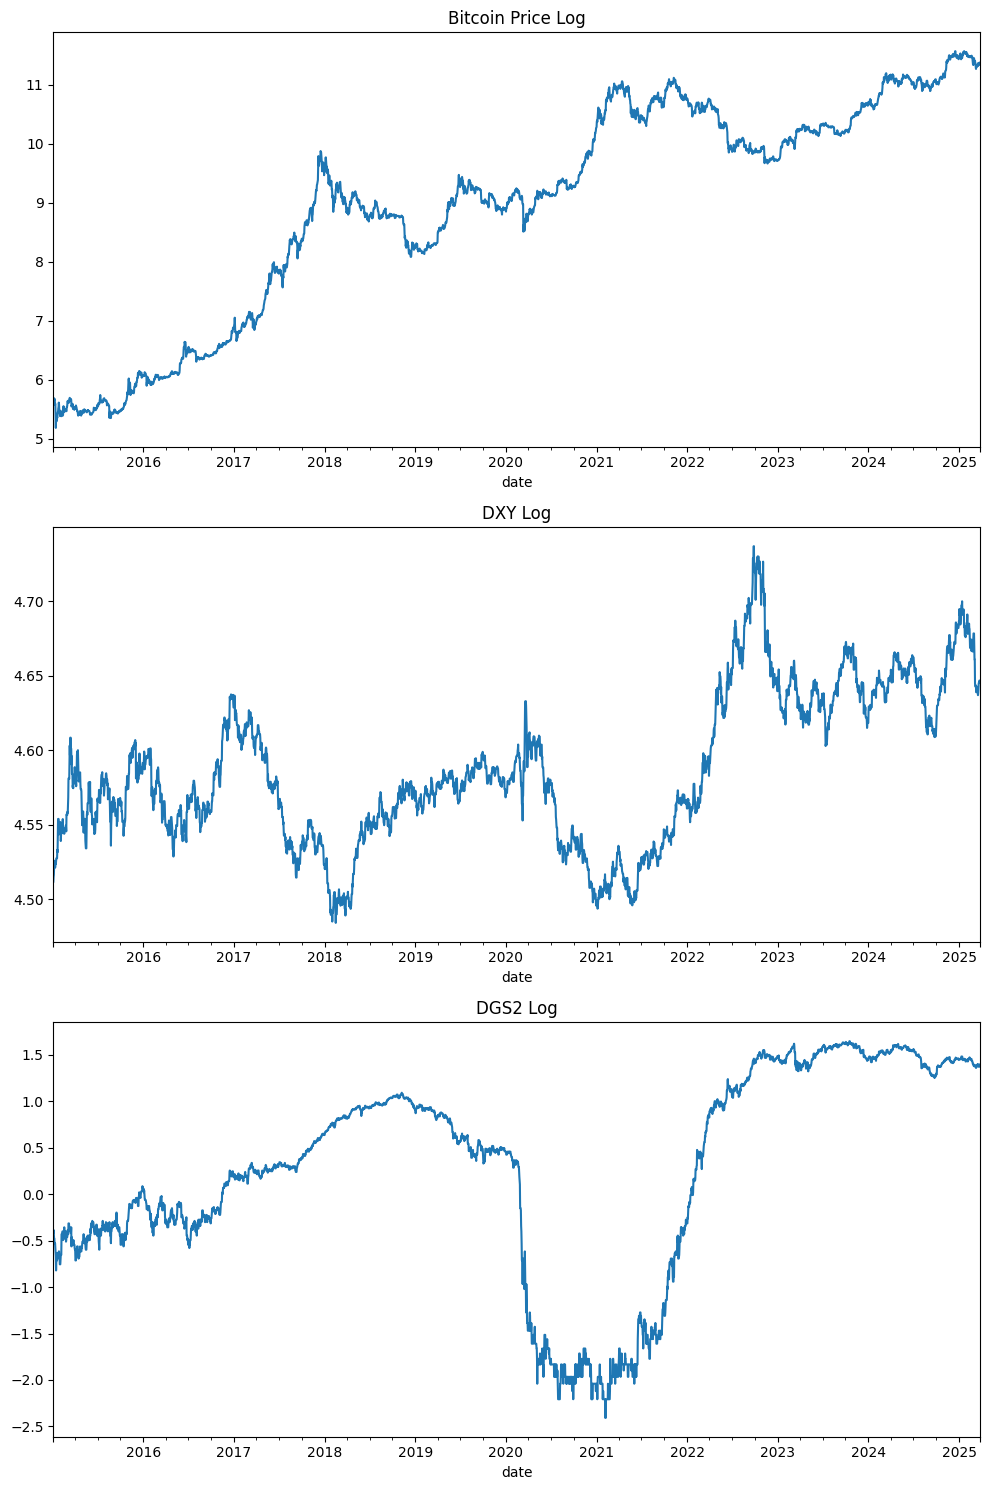

In [27]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

transformed_df['bitcoin_price_log'].plot(ax=axes[0], title='Bitcoin Price Log')
transformed_df['dxy_log'].plot(ax=axes[1], title='DXY Log')
transformed_df['DGS2_log'].plot(ax=axes[2], title='DGS2 Log')

plt.tight_layout()
plt.show()

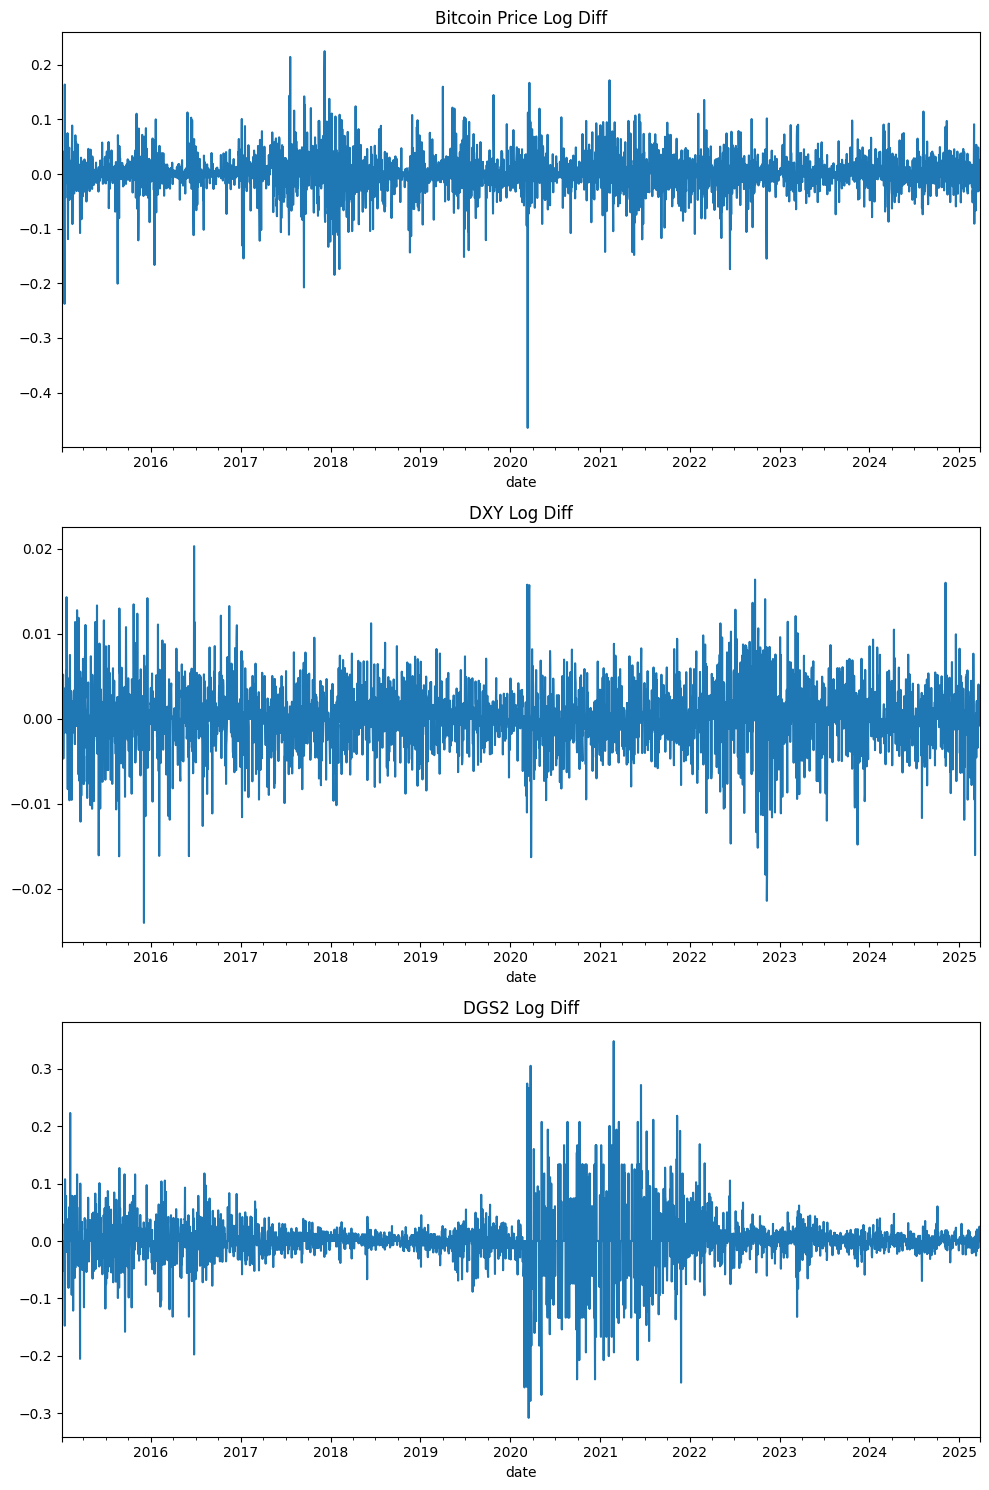

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

transformed_df['bitcoin_price_log_diff'].plot(ax=axes[0], title='Bitcoin Price Log Diff')
transformed_df['dxy_log_diff'].plot(ax=axes[1], title='DXY Log Diff')
transformed_df['DGS2_log_diff'].plot(ax=axes[2], title='DGS2 Log Diff')

plt.tight_layout()
plt.show()

In [29]:
# Agregamos las variaciones porcentuales diarias al dataset original

for col in transformed_df.columns:
    if col.endswith('_diff'):
        merged_df[col] = transformed_df[col].round(2)


merged_df.head()


,bitcoin_price,High_btc,Low_btc,Open_btc,Volume_btc,dxy,High_dxy,Low_dxy,Open_dxy,DGS2,Year,DGS2_log_diff,bitcoin_price_log_diff,dxy_log_diff
date,,,,,,,,,,,,,,
2015-01-03,281.08,315.15,281.08,314.85,33054400.0,91.08,91.16,90.33,90.36,0.66,2015,NaN,NaN,NaN
2015-01-04,264.20,287.23,257.61,281.15,55629100.0,91.08,91.16,90.33,90.36,0.66,2015,0.00,-0.06,0.0
2015-01-05,274.47,278.34,265.08,265.08,43962800.0,91.38,91.78,91.13,91.13,0.68,2015,0.03,0.04,0.0
2015-01-06,286.19,287.55,272.70,274.61,23245700.0,91.50,91.81,91.12,91.38,0.65,2015,-0.05,0.04,0.0
2015-01-07,294.34,298.75,283.08,286.08,24866800.0,91.89,92.27,91.65,91.75,0.62,2015,-0.05,0.03,0.0


---

# Feature Engineering

* Variables derivadas de la fecha

In [30]:
merged_df.reset_index(inplace = True)

merged_df['quarter'] = merged_df['date'].dt.quarter
merged_df['month'] = merged_df['date'].dt.month
merged_df['dayofyear'] = merged_df['date'].dt.dayofyear
merged_df['dayofweek'] = merged_df['date'].dt.dayofweek

merged_df.head()

,date,bitcoin_price,High_btc,Low_btc,Open_btc,Volume_btc,dxy,High_dxy,Low_dxy,Open_dxy,DGS2,Year,DGS2_log_diff,bitcoin_price_log_diff,dxy_log_diff,quarter,month,dayofyear,dayofweek
0,2015-01-03,281.08,315.15,281.08,314.85,33054400.0,91.08,91.16,90.33,90.36,0.66,2015,NaN,NaN,NaN,1,1,3,5
1,2015-01-04,264.20,287.23,257.61,281.15,55629100.0,91.08,91.16,90.33,90.36,0.66,2015,0.00,-0.06,0.0,1,1,4,6
2,2015-01-05,274.47,278.34,265.08,265.08,43962800.0,91.38,91.78,91.13,91.13,0.68,2015,0.03,0.04,0.0,1,1,5,0
3,2015-01-06,286.19,287.55,272.70,274.61,23245700.0,91.50,91.81,91.12,91.38,0.65,2015,-0.05,0.04,0.0,1,1,6,1
4,2015-01-07,294.34,298.75,283.08,286.08,24866800.0,91.89,92.27,91.65,91.75,0.62,2015,-0.05,0.03,0.0,1,1,7,2


In [31]:
# Move the 'Year' column to before the 'quarter' column
cols = merged_df.columns.tolist()
cols.insert(cols.index('quarter'), cols.pop(cols.index('Year')))
merged_df = merged_df[cols]

merged_df.head()

,date,bitcoin_price,High_btc,Low_btc,Open_btc,Volume_btc,dxy,High_dxy,Low_dxy,Open_dxy,DGS2,DGS2_log_diff,bitcoin_price_log_diff,dxy_log_diff,quarter,Year,month,dayofyear,dayofweek
0,2015-01-03,281.08,315.15,281.08,314.85,33054400.0,91.08,91.16,90.33,90.36,0.66,NaN,NaN,NaN,1,2015,1,3,5
1,2015-01-04,264.20,287.23,257.61,281.15,55629100.0,91.08,91.16,90.33,90.36,0.66,0.00,-0.06,0.0,1,2015,1,4,6
2,2015-01-05,274.47,278.34,265.08,265.08,43962800.0,91.38,91.78,91.13,91.13,0.68,0.03,0.04,0.0,1,2015,1,5,0
3,2015-01-06,286.19,287.55,272.70,274.61,23245700.0,91.50,91.81,91.12,91.38,0.65,-0.05,0.04,0.0,1,2015,1,6,1
4,2015-01-07,294.34,298.75,283.08,286.08,24866800.0,91.89,92.27,91.65,91.75,0.62,-0.05,0.03,0.0,1,2015,1,7,2


---

# Create target feature - 7 days ahead

In [35]:
merged_df['bitcoin_price_7d_future'] = merged_df['bitcoin_price'].shift(-7)
merged_df.head(10)

,date,bitcoin_price,High_btc,Low_btc,Open_btc,Volume_btc,dxy,High_dxy,Low_dxy,Open_dxy,DGS2,DGS2_log_diff,bitcoin_price_log_diff,dxy_log_diff,quarter,Year,month,dayofyear,dayofweek,bitcoin_price_7d_future
0,2015-01-03,281.08,315.15,281.08,314.85,33054400.0,91.08,91.16,90.33,90.36,0.66,NaN,NaN,NaN,1,2015,1,3,5,274.80
1,2015-01-04,264.20,287.23,257.61,281.15,55629100.0,91.08,91.16,90.33,90.36,0.66,0.00,-0.06,0.00,1,2015,1,4,6,265.66
2,2015-01-05,274.47,278.34,265.08,265.08,43962800.0,91.38,91.78,91.13,91.13,0.68,0.03,0.04,0.00,1,2015,1,5,0,267.80
3,2015-01-06,286.19,287.55,272.70,274.61,23245700.0,91.50,91.81,91.12,91.38,0.65,-0.05,0.04,0.00,1,2015,1,6,1,225.86
4,2015-01-07,294.34,298.75,283.08,286.08,24866800.0,91.89,92.27,91.65,91.75,0.62,-0.05,0.03,0.00,1,2015,1,7,2,178.10
5,2015-01-08,283.35,294.14,282.17,294.14,19982500.0,92.37,92.53,91.94,91.94,0.62,0.00,-0.04,0.01,1,2015,1,8,3,209.84
6,2015-01-09,290.41,291.11,280.53,282.38,18718600.0,91.94,92.50,91.90,92.31,0.59,-0.05,0.02,-0.00,1,2015,1,9,4,208.10
7,2015-01-10,274.80,288.13,273.97,287.30,15264300.0,91.94,92.50,91.90,92.31,0.59,0.00,-0.06,0.00,1,2015,1,10,5,199.26
8,2015-01-11,265.66,279.64,265.04,274.61,18200800.0,91.94,92.50,91.90,92.31,0.59,0.00,-0.03,0.00,1,2015,1,11,6,210.34
9,2015-01-12,267.80,272.20,265.20,266.15,18880300.0,91.98,92.34,91.73,91.88,0.56,-0.05,0.01,0.00,1,2015,1,12,0,214.86


In [36]:
merged_df.tail(10)

,date,bitcoin_price,High_btc,Low_btc,Open_btc,Volume_btc,dxy,High_dxy,Low_dxy,Open_dxy,DGS2,DGS2_log_diff,bitcoin_price_log_diff,dxy_log_diff,quarter,Year,month,dayofyear,dayofweek,bitcoin_price_7d_future
3725,2025-03-16,82579.69,85051.60,82017.91,84333.32,2.133027e+10,103.72,104.09,103.57,103.84,4.02,0.00,-0.02,0.0,1,2025,3,75,6,86054.38
3726,2025-03-17,84075.69,84725.33,82492.16,82576.34,2.509279e+10,103.37,103.81,103.30,103.74,4.06,0.01,0.02,-0.0,1,2025,3,76,0,87498.91
3727,2025-03-18,82718.50,84075.72,81179.99,84075.72,2.409577e+10,103.24,103.68,103.20,103.44,4.04,-0.00,-0.02,-0.0,1,2025,3,77,1,87471.70
3728,2025-03-19,86854.23,87021.19,82569.73,82718.80,3.493196e+10,103.43,103.91,103.25,103.27,3.99,-0.01,0.05,0.0,1,2025,3,78,2,NaN
3729,2025-03-20,84167.20,87443.27,83647.20,86872.95,2.902899e+10,103.85,104.13,103.32,103.43,3.95,-0.01,-0.03,0.0,1,2025,3,79,3,NaN
3730,2025-03-21,84043.24,84782.27,83171.07,84164.54,1.903045e+10,104.09,104.22,103.76,103.78,3.94,-0.00,-0.00,0.0,1,2025,3,80,4,NaN
3731,2025-03-22,83832.48,84513.88,83674.78,84046.26,9.863214e+09,104.09,104.22,103.76,103.78,3.94,0.00,-0.00,0.0,1,2025,3,81,5,NaN
3732,2025-03-23,86054.38,86094.78,83794.91,83831.90,1.259462e+10,104.09,104.22,103.76,103.78,3.94,0.00,0.03,0.0,1,2025,3,82,6,NaN
3733,2025-03-24,87498.91,88758.73,85541.20,86070.93,3.458260e+10,104.26,104.44,103.84,104.15,4.04,0.03,0.02,0.0,1,2025,3,83,0,NaN
3734,2025-03-25,87471.70,88542.40,86346.08,87512.82,3.000584e+10,104.18,104.47,103.94,104.33,4.04,0.00,-0.00,-0.0,1,2025,3,84,1,NaN


In [54]:
merged_df.set_index('date', inplace=True)

In [62]:
merged_df.to_csv('../data/preprocessed/transformed_df.csv', index=False)

---

---

# Anexo

## Functions testing

In [ ]:
# Funcion para generar los splits
def walk_forward_splits(df, train_up_to_date, number_of_val_windows, window_length = 7 ):
    
    # crear train / tests splits
    
    """
    Creates walk-forward CV splits. For each starting training cutoff in `train_up_to_date`,
    the function produces a series of train/test splits. Starting with training data up to the given date,
    it predicts the closing value for the next `window_length` days, then incorporates those days into training,
    then predicts the next window, repeating for `number_of_val_windows` windows.
    
    Parameters:
      df (pd.DataFrame): DataFrame with a DateTime index.
      train_up_to_date: lista con inicios de CV.
      number_of_val_windows: cantidad de ventanas a evaluar en cada CV.
      window_length: cantidad de dias en la ventana de evaluacion.
      
      
    Returns:
      dict: A dictionary where each key is a starting date from `train_up_to_date` and its value is a list 
            of (train, test) tuples for each CV split.
    """
    
    
    # Ensure the index is datetime
    df = df.copy()
    df.index = pd.to_datetime(df.index)
    
    # Dictionary to hold splits for each starting date
    cv_splits = {}
    
    # Loop over each provided starting date
    for start_date in train_up_to_date:
        # Convert to Timestamp if necessary
        start_date = pd.to_datetime(start_date, format='%Y-%m-%d')
        splits_for_date = []
        
        # Initial training: all data up to and including the start_date
        train = df[df.index <= start_date].copy()
        # Set current training end as the last date in the training set (which should be start_date)
        current_train_end = train.index.max()
        
        # Create walk-forward splits
        for window in range(number_of_val_windows):
            # Define test window: next 'window_length' days after current_train_end
            test_start = current_train_end + pd.Timedelta(days=1)
            test_end = test_start + pd.Timedelta(days=window_length - 1)
            
            # Get test set
            test = df[(df.index >= test_start) & (df.index <= test_end)].copy()
            # If no test data is available, break out of the loop
            if test.empty:
                break
            
            # Append the (train, test) tuple
            splits_for_date.append((train.copy(), test.copy()))
            
            # Update the training set to include the new test window
            train = pd.concat([train, test]).sort_index()
            # Update current training end
            current_train_end = train.index.max()
        
        cv_splits[start_date] = splits_for_date
        
    return cv_splits


def training_strategy(df, target, train_up_to_date = ["2024-12-31"], number_of_val_windows = 8):
    
    '''
    Definir training set. Hasta 2024 incluido por default.
    Definir set de validacion en 2025 ~ 8 semanas = 2 meses por defecto.
    Definir final test set 2025
    Definir future set 2025 (target es NaN)
    '''
    
    # Create future_set with rows where the target column is NaN
    future_set = df[df[target].isnull()].copy()
    
    # Exclude future_set from df to create available_data
    available_data = df[~df.index.isin(future_set.index)].copy()
    
    
    # Generamos los splits de train y splits para CV walk forward.     
    cv_splits = walk_forward_splits(available_data, train_up_to_date, number_of_val_windows)
    
    return cv_splits , future_set

In [84]:
cvsplits, future = training_strategy(merged_df, target = "bitcoin_price_7d_future")

In [85]:
# Assuming cv_splits is the dictionary returned by walk_forward_splits
for cutoff_date, splits in cvsplits.items():
    print(f"CV splits starting from: {cutoff_date}")
    for i, (train, test) in enumerate(splits, start=1):
        print(f"  Window {i}:")
        print(f"    Train set from {train.index.min().date()} to {train.index.max().date()}")
        print(f"    Test set  from {test.index.min().date()} to {test.index.max().date()}")


CV splits starting from: 2024-12-31 00:00:00
  Window 1:
    Train set from 2015-01-03 to 2024-12-31
    Test set  from 2025-01-01 to 2025-01-07
  Window 2:
    Train set from 2015-01-03 to 2025-01-07
    Test set  from 2025-01-08 to 2025-01-14
  Window 3:
    Train set from 2015-01-03 to 2025-01-14
    Test set  from 2025-01-15 to 2025-01-21
  Window 4:
    Train set from 2015-01-03 to 2025-01-21
    Test set  from 2025-01-22 to 2025-01-28
  Window 5:
    Train set from 2015-01-03 to 2025-01-28
    Test set  from 2025-01-29 to 2025-02-04
  Window 6:
    Train set from 2015-01-03 to 2025-02-04
    Test set  from 2025-02-05 to 2025-02-11
  Window 7:
    Train set from 2015-01-03 to 2025-02-11
    Test set  from 2025-02-12 to 2025-02-18
  Window 8:
    Train set from 2015-01-03 to 2025-02-18
    Test set  from 2025-02-19 to 2025-02-25
